<a href="https://colab.research.google.com/github/marcelo0211/arquivos/blob/master/Modelo_%20Regress_%20MKT_DESAFIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aluno: Marcelo Lira de Carvalho - DS07_ RID: 98073**

# **Desafio: Construindo um modelo de Regressão para marketing**

# **Etapa 01) Análise Descritiva**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression




In [2]:
df = pd.read_csv('/content/MKT.csv')

In [3]:
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [4]:
df.shape

(171, 4)

In [5]:
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.rename (columns= {'sales': 'vl_vendas', 'newspaper': 'jornal'}, inplace = True)

In [7]:
df

,youtube,facebook,jornal,vl_vendas
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


# Resumo de valores não nulos encontrados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   jornal     171 non-null    float64
 3   vl_vendas  171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


# Retornar a soma dos valores nulos encontrados

In [9]:
df.isnull().sum()

youtube      0
facebook     0
jornal       0
vl_vendas    0
dtype: int64

# **Etapa 02) Análise Exploratória**

# Retornar um resumo estatístico das variáveis numéricas

In [10]:
df.describe()

,youtube,facebook,jornal,vl_vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


# Detecção de Outliers

Na detecção de Outliers via plt dentro dos investimentos encontrei na coluna "Jornal" dois pontos que ficaram "um pouco" acima da amostra conforme demonstra o grafico abaixo. Os demais "youtube" e "facebook" não apresentaram Discrepancias em relacao ao investimento.É notório a vantagem em relação ao investimento de youtube, pois percebe-se uma correlação com mais linearidade e com pontos mais próximos um dos outros em relação aos demais investimentos onde pode ser notado nos graficos de correlação abaixo:

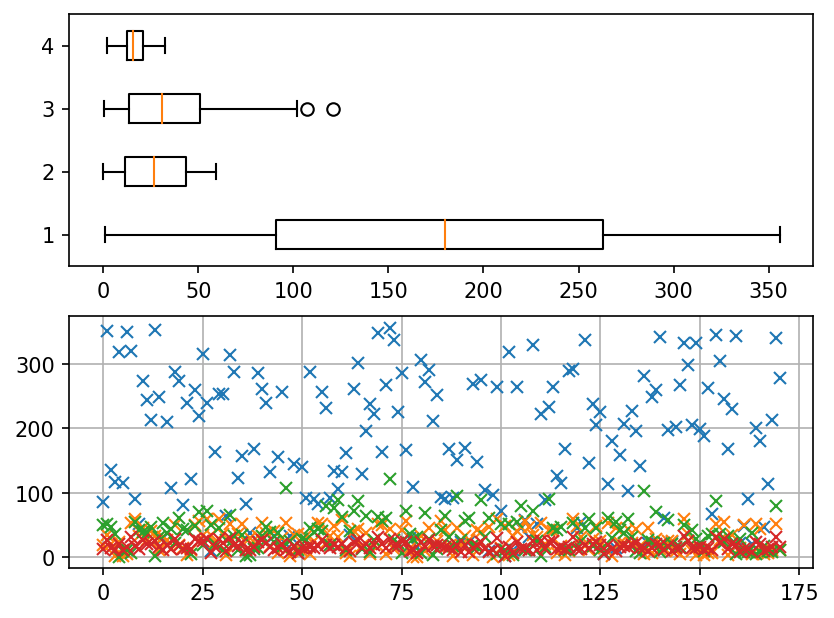

In [11]:
plt.figure(dpi = 150)
plt.subplot(211)
plt.boxplot(df,vert = False) #Irá mostrar possiveis valores descrepantes
plt.subplot(212)
plt.plot(df, 'x')
plt.grid()
plt.show()

# Descobrindo os Quartis

In [12]:
print("youtube  - Q1 ", np.quantile(df['youtube'], .25, interpolation= "midpoint"))
print("youtube  - Q2 ", np.quantile(df['youtube'], .50, interpolation= "midpoint"))
print("youtube  - Q3 ", np.quantile(df['youtube'], .75, interpolation= "midpoint"))

print("facebook - Q1 ", np.quantile(df['facebook'], .25, interpolation= "midpoint"))
print("facebook - Q2 ", np.quantile(df['facebook'], .50, interpolation= "midpoint"))
print("facebook - Q3 ", np.quantile(df['facebook'], .75, interpolation= "midpoint"))

print("jornal   - Q1 ", np.quantile(df['jornal'], .25, interpolation= "midpoint"))
print("jornal   - Q2 ", np.quantile(df['jornal'], .50, interpolation= "midpoint"))
print("jornal   - Q3 ", np.quantile(df['jornal'], .75, interpolation= "midpoint"))

youtube  - Q1  91.08
youtube  - Q2  179.76
youtube  - Q3  262.98
facebook - Q1  11.7
facebook - Q2  26.76
facebook - Q3  43.68
jornal   - Q1  13.739999999999998
jornal   - Q2  31.08
jornal   - Q3  50.879999999999995


<ipython-input-12-22dc344e2526>:1: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  print("youtube  - Q1 ", np.quantile(df['youtube'], .25, interpolation= "midpoint"))
<ipython-input-12-22dc344e2526>:2: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  print("youtube  - Q2 ", np.quantile(df['youtube'], .50, interpolation= "midpoint"))
<ipython-input-12-22dc344e2526>:3: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method th

In [13]:
df[df['jornal'] >= 100]

,youtube,facebook,jornal,vl_vendas
46,20.28,52.44,107.28,10.44
72,355.68,43.56,121.08,28.56
136,281.40,4.08,101.76,14.28


# Correlação

A melhor correlacao entre vendas encontra-se com o Youtube e em segundo lugar com pequena diferença o facebook. Isso é perceptível também na plotagem com seaborn onde existem vários pontos próximos a linha:

In [14]:
df.corr()

,youtube,facebook,jornal,vl_vendas
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
jornal,0.110759,0.293425,1.000000,0.254987
vl_vendas,0.782030,0.602918,0.254987,1.000000


# YOUTUBE X SALES(VALOR VENDAS)

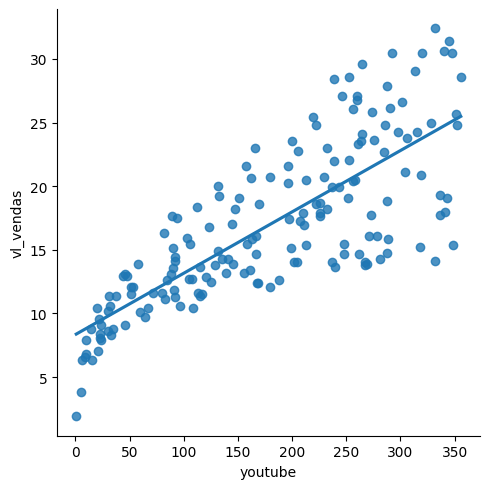

In [15]:
sns.lmplot(x='youtube' , y= 'vl_vendas', data = df , ci= None)

# FACEBOOK X VALOR VENDAS

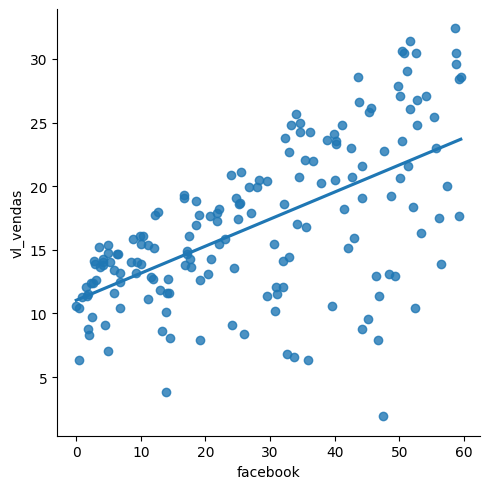

In [16]:
sns.lmplot(x='facebook' , y= 'vl_vendas', data = df , ci= None)

# JORNAL X VALOR VENDAS

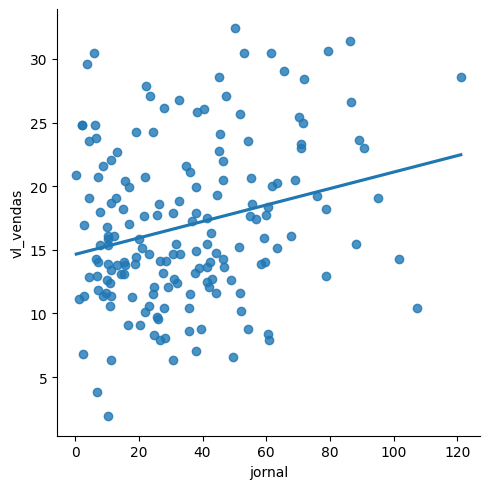

In [17]:
sns.lmplot(x='jornal' , y= 'vl_vendas', data = df , ci= None)

# Etapa 03) Modelagem

Aqui é só trocar a coluna do eixo "X" para "Jornal", "Youtube" ou "Facebook" para chegar nos resultados mantendo o eixo "y" com a coluna "Vl_vendas".

---



In [18]:
# Separando os dados em variáveis independentes (features) e variável dependente (target)
X = df[['jornal']]  # Apenas os dados do YouTube
y = df[['vl_vendas']]  # Variável de vendas


In [19]:
# Criando o modelo de regressão
model = LinearRegression()


In [20]:
# Treinando o modelo com os dados
model.fit(X, y)

LinearRegression()

In [21]:
# Fazendo previsões
y_pred = model.predict(X)


In [22]:
# Coeficientes do modelo
print('Coeficientes:')
print('Coeficiente angular (slope):', model.coef_)
print('Intercepto (intercept):', model.intercept_)

Coeficientes:
Coeficiente angular (slope): [[0.06465679]]
Intercepto (intercept): [14.64430174]


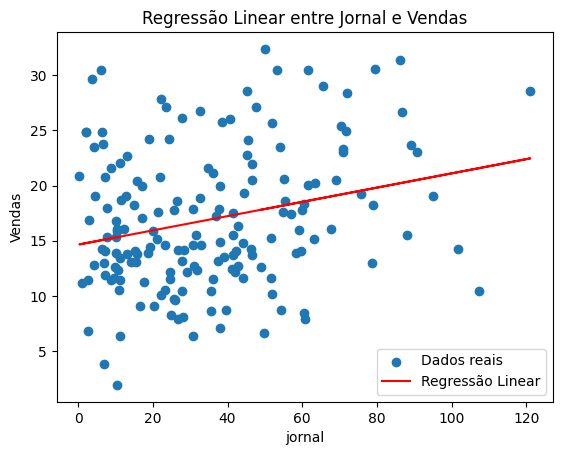

In [23]:
# Visualizando os resultados da regressão
plt.scatter(X, y, label='Dados reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.xlabel('jornal')
plt.ylabel('Vendas')
plt.title('Regressão Linear entre Jornal e Vendas')
plt.legend()
plt.show()

# Etapa 04) Calculando predição Youtube X Vendas

**Resumo:**

*   **Investimento Youtube** - A predição se mostra positivamente, pois as vendas refletem no investimento.
*   **Investimento Facebook** - A predição mostra que houve um baixo investimento e as vendas poderiam ser melhores caso houvesse um melhor investimento.
*   **Investimento Jornal** - Aqui houve um consideravel investimento, mas as vendas nao acompanharam refletindo que este canal não é uma boa opção.



In [53]:
dfp = pd.read_csv('/content/MKT_Prev_1.csv')

In [54]:
dfp.rename (columns= {'sales': 'vl_vendas', 'newspaper': 'jornal'}, inplace = True)

In [55]:
# Gerando dados de exemplo Youtube X Vendas
X = dfp[['youtube']]  # Variável independente
y = dfp[['vl_vendas']] # Variável dependente



In [56]:
# Criando o modelo de regressão
model_y = LinearRegression()


In [57]:

# Treinando o modelo com os dados
model_y.fit(X, y)



LinearRegression()

In [58]:
X_new = np.array(dfp[['youtube']])  # Utilizando os dados de investimento da coluna Youtube
y_pred = model_y.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Imprimindo as previsões
for i, x in enumerate(X_new):
    print(f'Para X = {x[0]}, a previsão é y = {y_pred[i][0]}')



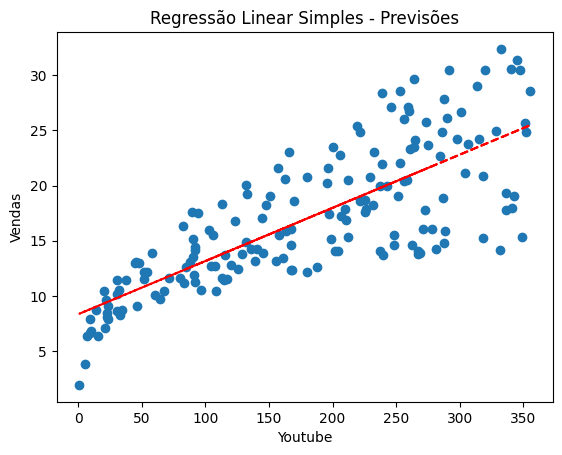

In [60]:
# Visualizando os resultados da regressão
plt.scatter(X, y)
plt.plot(X_new, y_pred, '--r')
plt.xlabel('Youtube')
plt.ylabel('Vendas')
plt.title('Regressão Linear Simples - Previsões')
plt.show()

# Calculando predição Facebook X Vendas

In [32]:
 #Gerando dados de exemplo Facebook X Vendas
X = dfp[['facebook']]  # Variável independente
y = dfp[['vl_vendas']] # Variável dependente

In [33]:
# Criando o modelo de regressão
model_f = LinearRegression()

In [34]:
# Treinando o modelo com os dados
model_f.fit(X, y)

LinearRegression()

In [44]:
X_new = np.array(dfp[['facebook']])  # Utilizando os dados de investimento da coluna facebook
y_pred = model_f.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Imprimindo as previsões
for i, x in enumerate(X_new):
    print(f'Para X = {x[0]}, a previsão é y = {y_pred[i][0]}')

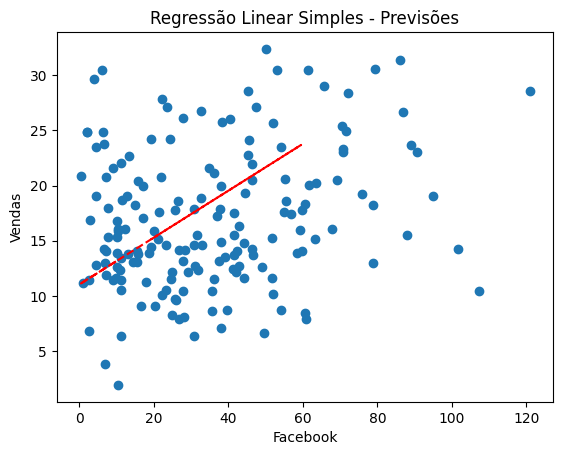

In [46]:
# Visualizando os resultados da regressão
plt.scatter(X, y)
plt.plot(X_new, y_pred, '--r')
plt.xlabel('Facebook')
plt.ylabel('Vendas')
plt.title('Regressão Linear Simples - Previsões')
plt.show()

# Calculando predição Jornal X Vendas

In [47]:
#Gerando dados de exemplo Facebook X Vendas
X = dfp[['jornal']]  # Variável independente
y = dfp[['vl_vendas']] # Variável dependente

In [48]:
# Criando o modelo de regressão
model_j = LinearRegression()

In [49]:
# Treinando o modelo com os dados
model_j.fit(X, y)

LinearRegression()

In [50]:
X_new = np.array(dfp[['jornal']])  # Utilizando os dados de investimento da coluna Jornal
y_pred = model_f.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Imprimindo as previsões
for i, x in enumerate(X_new):
    print(f'Para X = {x[0]}, a previsão é y = {y_pred[i][0]}')

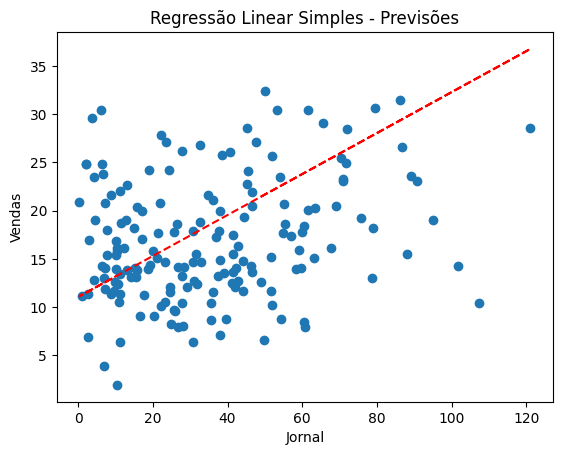

In [52]:
# Visualizando os resultados da regressão
plt.scatter(X, y)
plt.plot(X_new, y_pred, '--r')
plt.xlabel('Jornal')
plt.ylabel('Vendas')
plt.title('Regressão Linear Simples - Previsões')
plt.show()